In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.animation import FuncAnimation

%matplotlib inline

In [2]:
from fabrik_solver import fabrik_solve
from newton2d3l_solver import NewtonSolver2D3L
from utils import compute_theta, compute_angles_from_trajectory, rad2degrees, degrees2rad

class IK:
    @staticmethod
    def solve(target, trajectory, jnts, links, algo='fabrik'):
        if algo == 'fabrik':
            return fabrik_solve(target, trajectory, jnts, links)
        if algo == 'root_finding':
            return NewtonSolver2D3L(jnts, links).solve(target, trajectory, jnts, links)

In [3]:
# robot arm topology
links = np.array([3, 3, 3]).astype(np.float32)
jnts = np.array([[1, 1], [1, 4], [1, 7], [1, 10]]).astype(np.float32)
thetas = degrees2rad(np.array([90.0, 90.0, 90.0]))

def run_solver(links, jnts, thetas, algo):
    # 2D robotic link (3 links)
    '''
        /|--*--*--*
    '''

    fig = plt.figure(figsize=(10, 10))

    plt.grid()
    max_x = 15
    max_y = 15
    plt.xlim(0, max_x)
    plt.ylim(0, max_y)
    xdim = np.arange(0, max_x, 1)
    ydim = np.arange(0, max_y, 1)
    plt.xticks(xdim)
    plt.yticks(ydim)

    # Move the robot arm and solve IK
    # (x, y)
    trajectory = [ np.copy(jnts) ]
    target = np.array([4, 4])
    plt.scatter(target[0], target[1], marker='X', c='r')
    trajectory = IK.solve(target, trajectory, jnts, links, algo)
    print(f'\nTrajectory size: {trajectory.shape}')

    for jnts in trajectory:
        print(jnts)
        color = [*np.random.random(3), 0.3]
        for idx in range(len(jnts)):
            plt.text(jnts[idx][0], jnts[idx][1], str(idx), fontsize=12)
        plt.plot(jnts[:, 0], jnts[:, 1], marker='o', linestyle='--', color=color)
    
    if algo == 'fabrik':
        deltas = compute_angles_from_trajectory(trajectory)
        
        print(f'\nAngles: {deltas.shape}')
        for idx in range(deltas.shape[0]):
            print(deltas[idx])
    else:
        print(f'\nAngles: {thetas.shape}')
        for idx in range(thetas.shape[0]):
            print(thetas[idx])

    fig.show()

The robot arm is within reach
dist= 0.0011065106945241392
Trajectory size: (4, 4, 2)
[[ 1.  1.]
 [ 1.  4.]
 [ 1.  7.]
 [ 1. 10.]]
[[1.        1.       ]
 [0.6583143 3.9804783]
 [2.1440015 6.586766 ]
 [3.8928964 4.149274 ]]
[[1.        1.       ]
 [0.6120888 3.9748151]
 [2.2742457 6.472261 ]
 [3.991407  4.01231  ]]
[[1.         1.        ]
 [0.60851157 3.9743466 ]
 [2.2845533  6.4624953 ]
 [3.9993675  4.000908  ]]

Angles: (3, 3)
[   6.53990613  -29.68485591 -144.34064945]
[ 0.88944772 -3.96060813 -0.74250303]
[ 0.06890295 -0.31913717 -0.05464493]


<ipython-input-3-4fa4f50a6fc9>:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


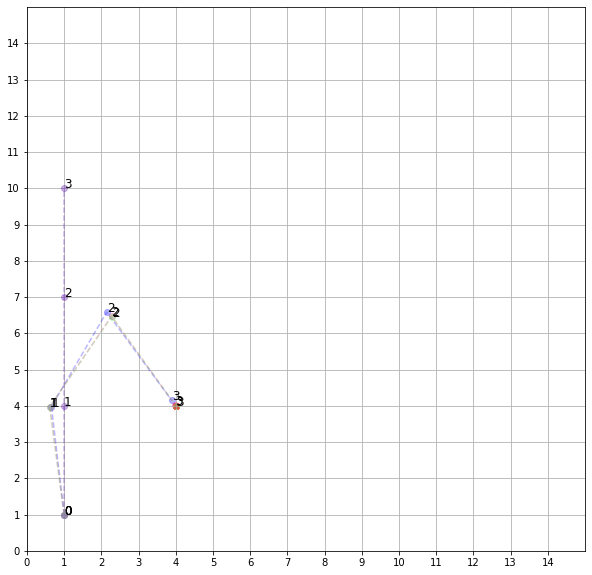

In [4]:
run_solver(links, jnts, thetas, 'fabrik')

/home/filip.grigorov/Workspace/training/robotics/inverse_kinematics_solver/inverse_kinematics_solver/newton_method.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([ p0, p1, p2, p3 ])


ValueError: All dimensions of input must be of equal length

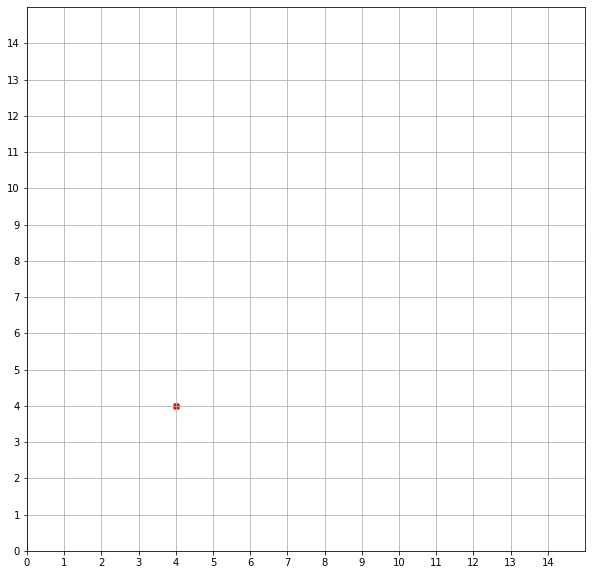

In [5]:
run_solver(links, jnts, thetas, 'root_finding')